<div class="panel panel-success" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Модели</h3> 
    </div>
</div>

`from` __`sklearn.linear_model`__ `import` __`*`__ - здесь различные регрессионные линейные модели:
<ol>
    <li> __`LinearRegression`__
    <li> __`Ridge`__
    <li> __`Lasso`__
    <li> __`ElasticNet`__
    <li> __`SGDRegressor`__
</ol>

<br>

`from` __`sklearn.model_selection`__ `import` __`*`__ - здесь лежат различные варианты поиска оптимальных параметров:
<ol>
    <li> __`GridSearchCV`__ - перебор параметров по сетке;
    <li> __`RandomizedSearchCV`__ - перебор параметров на основе Байесовского оценивания.
</ol>

<div class="panel panel-warning">
    <div class="panel-heading">
        <h3 class="panel-title">Как этим пользоваться?</h3> 
    </div>
</div>

Почти любые объекты из пакета `sklearn` стараются придерживаться одного интерфейса:

<ol>
    <li> __`fit`__ - самый главый метод. Если имеем дело с классификатором, то __`fit`__ определит параметры модели, то есть модель _"выучится из данных"_. Если имеем дело с масштабированием данных, тем же MinMaxScaler, то во время __`fit`__ он запомнит, какой был размах у первоначальных данных, чтобы знать, как их восстановить из "сжатого" состояния;

<br><br>

    <li> __`predict`__ говорит за себя. Если мы только что натренировали с помощью __`fit`__ классификатор, то с помощью __`predict`__ можно сформировать его предсказания! __`predict`__ есть только у классификаторов, а у других классов его заменой служит следующая функция:
    
<br><br>
    
    <li> __`transform`__ - преобразование данных после того, как __`fit`__ произведен. То есть если работаем с MinMaxScaler, с помощью __`transform`__ можно масштабировать данные, и так далее.
    
<br><br>

    <li> __`fit_transform`__ - просто удобный аналог последовательному вызову __`fit`__, а затем __`transform`__, - ничего магического, словом.

<br><br>
    
    <li> __`inverse_transform`__ - процедура, обратная __`transform`__. С помощью нее можно раскукожить данные MinMaxScaler'а, полученные при __`transform`__. _("Thanks, capitain Obvious!", - "Go fuck yourself")_

</ol>

<div class="panel panel-warning" style="margin: 10px 0 0 0">
    <div class="panel-heading">
        <h4 class="panel-title">И че?</h4> 
    </div>
</div>

<ol>
    <li> Взял данные.
    <li> Разбил на train и test.
    <li> Если подготовить как-то надо - берешь свой преобразоватор, __`fit_transform`__ на трейне, __`transform`__ на тесте.
    <li> Потом взял свой любимый классификатор/регрессор, __`fit`__ на трейне, __`predict`__ на трейне и тесте.
    <li> Не путай!
    <li> Повтори, что прочитал, вслух!
</ol>

---

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

---

In [4]:
m = 100
X = 10 * np.random.rand(m, 1) - 5
y = 0.5 * X + 2 + np.random.randn(m, 1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

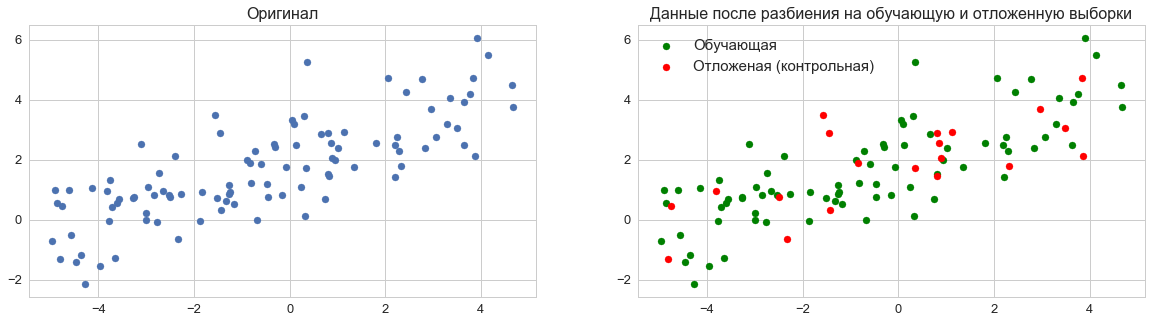

In [7]:
f, axs = plt.subplots(1,2, figsize=(20, 5))

axs[0].set_title('Оригинал')
axs[0].scatter(X, y)

axs[1].set_title('Данные после разбиения на обучающую и отложенную выборки')
axs[1].scatter(X_train, y_train, c='g', label='Обучающая')
axs[1].scatter(X_test, y_test, c='r', label='Отложеная (контрольная)')
axs[1].legend()

f.show()

---

__1. Импортировали!__

In [8]:
from sklearn.linear_model import LinearRegression

__2. fit!__

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train);

__3. predict!__

In [10]:
y_hat = lr.predict(X_test)

---

In [11]:
X_check = np.linspace(X_train.min(), X_train.max(), num=20).reshape(-1, 1)
y_check = lr.predict(X_check)

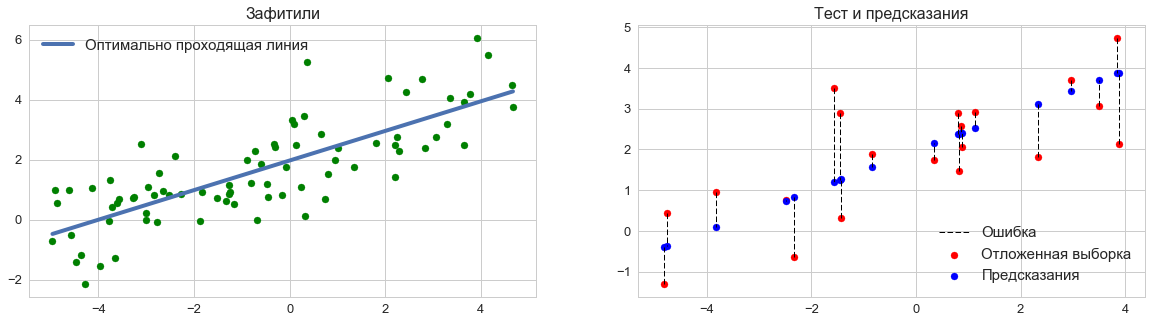

In [12]:
f, axs = plt.subplots(1,2, figsize=(20, 5))

axs[0].set_title('Зафитили')
axs[0].scatter(X_train, y_train, c='g')
axs[0].plot(X_check.ravel(), y_check, lw=4, label='Оптимально проходящая линия')
axs[0].legend()

axs[1].set_title('Тест и предсказания')
axs[1].scatter(X_test, y_test, c='r', label='Отложенная выборка')
axs[1].scatter(X_test, y_hat, c='b', label='Предсказания')

kwa = { 'linewidth': 1, 'color': 'k', 'linestyle': '--' }
for i in range(len(X_test)):
    if i == len(X_test)-1:
        kwa['label'] = 'Ошибка'
    plt.plot((X_test[i][0], X_test[i][0]), (y_test[i][0], y_hat[i][0]), **kwa)
    
axs[1].legend()

f.show()

<div style="margin: 50px 0 0 0" />

__1. Импортировали!__

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

__2. fit!__

In [14]:
ss_X = StandardScaler()
ss_X.fit(X_train);

ss_y = StandardScaler()
ss_y.fit(y_train);

__3. trasform!__

In [15]:
X_train_scaled = ss_X.transform(X_train)
X_test_scaled  = ss_X.transform(X_test)

y_train_scaled = ss_y.transform(y_train)
y_test_scaled  = ss_y.transform(y_test)

In [16]:
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train_scaled);

In [17]:
y_hat_scaled = sgd.predict(X_test_scaled)

In [18]:
y_hat = ss_y.inverse_transform(y_hat_scaled)

---

In [19]:
X_check_scaled = np.linspace(X_train_scaled.min(), X_train_scaled.max(), num=20).reshape(-1, 1)
y_check_scaled = sgd.predict(X_check_scaled)

X_check_sgd = ss_X.inverse_transform(X_check_scaled)
y_check_sgd = ss_y.inverse_transform(y_check_scaled)

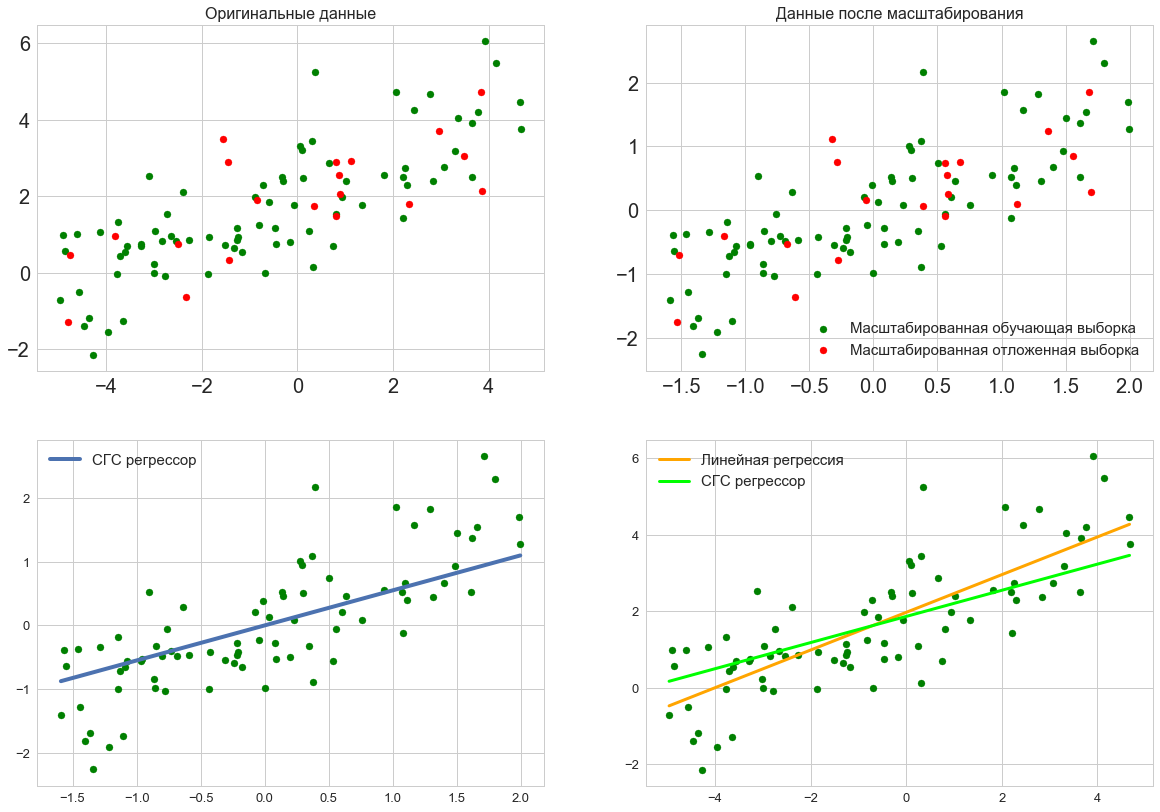

In [20]:
f, axs = plt.subplots(2,2, figsize=(20, 14))

axs[0, 0].set_title('Оригинальные данные')
axs[0, 0].scatter(X_train, y_train, c='g')
axs[0, 0].scatter(X_test, y_test, c='r')
for item in axs[0, 0].get_xticklabels() + axs[0, 0].get_yticklabels():
    item.set_fontsize(20)

axs[0, 1].set_title('Данные после масштабирования')
axs[0, 1].scatter(X_train_scaled, y_train_scaled, c='g', label='Масштабированная обучающая выборка')
axs[0, 1].scatter(X_test_scaled, y_test_scaled, c='r', label='Масштабированная отложенная выборка')
axs[0, 1].legend()
for item in axs[0, 1].get_xticklabels() + axs[0, 1].get_yticklabels():
    item.set_fontsize(20)

axs[1, 0].scatter(X_train_scaled, y_train_scaled, c='g')
axs[1, 0].plot(X_check_scaled.ravel(), y_check_scaled, lw=4, label='СГС регрессор')
axs[1, 0].legend()

axs[1, 1].scatter(X_train, y_train, c='g')
axs[1, 1].plot(X_check.ravel(),     y_check,     c='orange', lw=3, label='Линейная регрессия')
axs[1, 1].plot(X_check_sgd.ravel(), y_check_sgd, c='lime',   lw=3, label='СГС регрессор')
axs[1, 1].legend()

f.show()

<div style="margin: 50px 0 0 0" />

__1. Импортировали!__

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

<div class="panel panel-warning">
    <div class="panel-heading">
        <h3 class="panel-title">Обратите внимание</h3> 
    </div>
</div>

GridSearch прогоняет все комбинации гиперпараметров, поэтому в коде ниже будут тренироваться <b>45</b> разных классификаторов! Будьте внимательны и следите в своем коде, чтобы количество прогонов было разумным. 

Сейчас нам просто повезло, что выборка очень маленькая, и линейные классификаторы очень быстрые.

In [22]:
import json

In [23]:
params = { 
    'alpha':    [10**x     for x in range(-2,3)],
    'l1_ratio': [x*10/100. for x in range(1,10)]
}
print(json.dumps(params, indent=4))

{
    "alpha": [
        0.01,
        0.1,
        1,
        10,
        100
    ],
    "l1_ratio": [
        0.1,
        0.2,
        0.3,
        0.4,
        0.5,
        0.6,
        0.7,
        0.8,
        0.9
    ]
}


__2. fit!__

In [24]:
en = ElasticNet()
gs = GridSearchCV(en, param_grid=params)
gs.fit(X_train, y_train);

Набор оптимальных параметров лежит в <b>.best\_params_</b>, а сам классификатор - в <b>.best\_estimator_</b>.


In [25]:
gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0.6}

In [26]:
gs.best_score_

0.60122231639269486

__3. predict!__

In [27]:
y_hat = gs.best_estimator_.predict(X_test)